In [1]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")

import re
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno
import folium
%matplotlib inline  

# Loading data set

In [2]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [4]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2845342, 47)


# Data Preparation & Cleaning

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [7]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

## missing values per column

<AxesSubplot:>

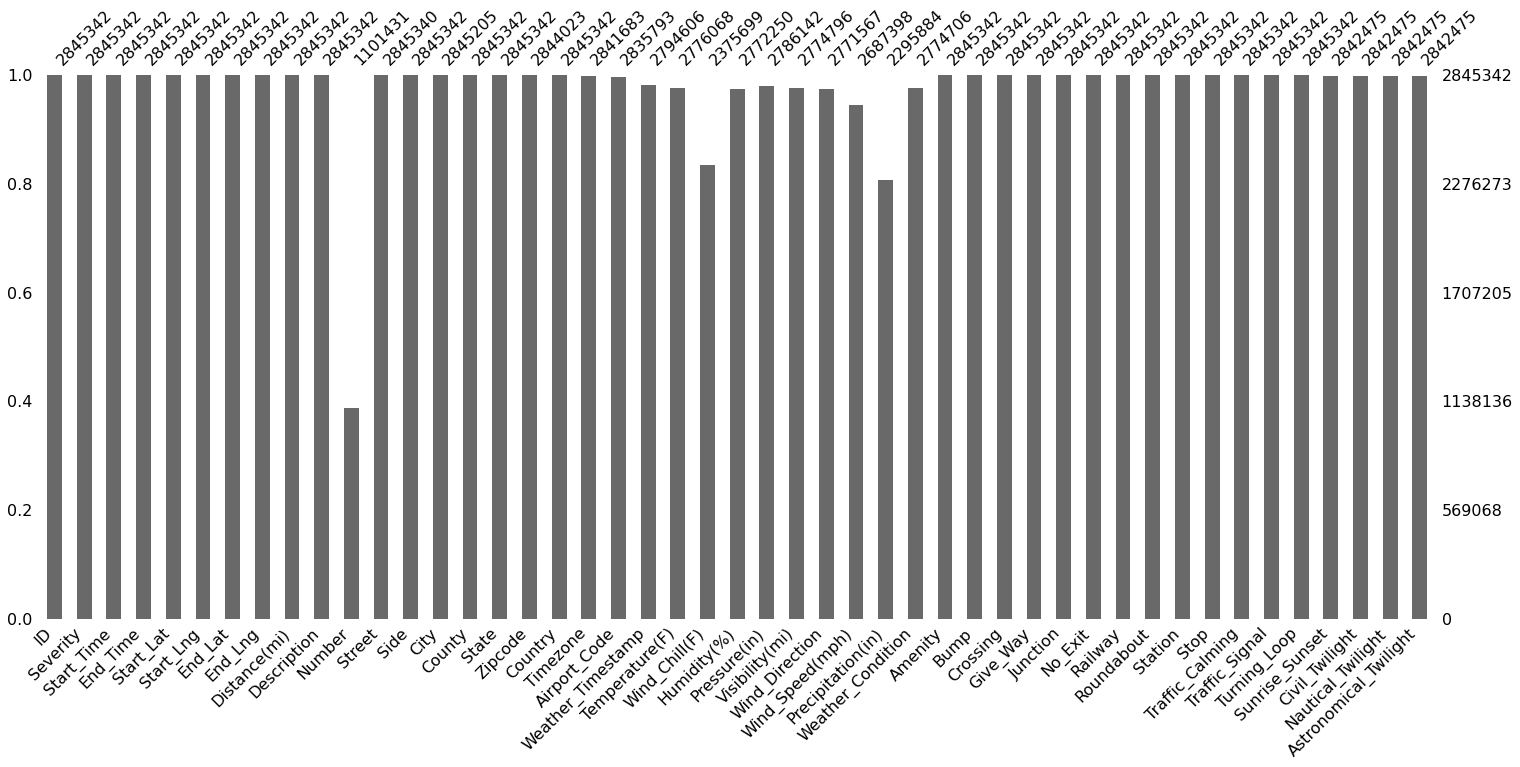

In [8]:
msno.bar(df)

# Remove unecceary columns 

In [9]:
df1=df
# Droping the unnecessary Columns
df1.drop("Number", axis='columns', inplace=True)
df1.drop("Wind_Chill(F)", axis='columns', inplace=True)
df1.drop("Precipitation(in)", axis='columns', inplace=True)
df1.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day


In [10]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Humidity(%)            float64
 22  Pressure(in)      

## NOW IMPUTE THE MISSING VALUES

### -  impute the missing values of numerical columns

In [12]:
df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(df1["Visibility(mi)"].median())
df1["Temperature(F)"]=df1["Temperature(F)"].fillna(df1["Temperature(F)"].median())
df1["Humidity(%)"]=df1["Humidity(%)"].fillna(df1["Humidity(%)"].median())
df1["Wind_Speed(mph)"]=df1["Wind_Speed(mph)"].fillna(df1["Wind_Speed(mph)"].median())
df1["Pressure(in)"]=df1["Pressure(in)"].fillna(df1["Pressure(in)"].median())

###  Impute the missing values of categorical column:

In [13]:
df1["City"]=df1["City"].fillna(df1["City"].mode()[0])
df1["Weather_Condition"]=df1["Weather_Condition"].fillna(df1["Weather_Condition"].mode()[0])
df1["Sunrise_Sunset"]=df1["Sunrise_Sunset"].fillna(df1["Sunrise_Sunset"].mode()[0])
df1["Timezone"]=df1["Timezone"].fillna(df1["Timezone"].mode()[0])

In [14]:
df1.isna().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Description                  0
Street                       2
Side                         0
City                         0
County                       0
State                        0
Zipcode                   1319
Country                      0
Timezone                     0
Airport_Code              9549
Weather_Timestamp        50736
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           73775
Wind_Speed(mph)              0
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit 

In [15]:
df1.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day


In [16]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

## creating the Day/Week/Month/Year and Weekdays/hour columns

In [17]:
df2=df1
df2.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day


In [18]:
df2.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [19]:
df2.Start_Time= pd.to_datetime(df2.Start_Time)
df2.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [20]:
df2.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

In [21]:
df2['Year'] = df2['Start_Time'].dt.year
df2['Month'] = df2['Start_Time'].dt.month
df2['Week'] = df2['Start_Time'].dt.isocalendar().week
df2['hour'] = df2['Start_Time'].dt.hour
df2['Weekday'] = df2['Start_Time'].dt.weekday

In [22]:
df2["Year"].unique()

array([2016, 2017, 2021, 2020, 2018, 2019], dtype=int64)

In [23]:
df2.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Week,hour,Weekday
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,Night,Night,Night,Night,2016,2,6,0,0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,Night,Night,Night,Night,2016,2,6,5,0
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,Night,Night,Night,Day,2016,2,6,6,0


# EDA & Vizualisation on state of illinois

In [24]:
df_illinois = df2.loc[df['State']=='IL']
df_illinois

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Week,hour,Weekday
21357,A-21358,2,2016-09-14 17:31:13,2016-09-14 23:31:13,41.518134,-90.512947,41.519500,-90.513010,0.094,At Illinois/Iowa State Line - Accident.,...,False,Day,Day,Day,Day,2016,9,37,17,2
21358,A-21359,2,2016-09-14 17:31:13,2016-09-14 23:31:13,41.519500,-90.513010,41.525270,-90.513410,0.399,Between Memorial Brg and US-67/State St/Exit 4...,...,False,Day,Day,Day,Day,2016,9,37,17,2
31490,A-31491,4,2016-08-01 01:22:44,2016-08-01 07:22:44,40.849930,-90.749460,40.864380,-90.739750,1.120,Closed between Media and North St - Road close...,...,False,Night,Night,Night,Night,2016,8,31,1,0
31491,A-31492,4,2016-08-01 01:27:46,2016-08-01 07:27:46,40.849930,-90.749460,40.850520,-90.815020,3.427,Closed between Media and CR-2/1900 E - Road cl...,...,False,Night,Night,Night,Night,2016,8,31,1,0
31574,A-31575,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,...,False,Day,Day,Day,Day,2016,11,48,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845052,A-2845053,3,2019-08-23 17:41:30,2019-08-23 18:10:38,41.636507,-87.578370,41.640865,-87.578360,0.301,At the Cal Sag River - Accident.,...,False,Day,Day,Day,Day,2019,8,34,17,4
2845053,A-2845054,3,2019-08-23 18:26:04,2019-08-23 18:54:36,41.862250,-87.918500,41.858720,-87.919590,0.250,At IL-38/Roosevelt Rd - Accident. Right lane b...,...,False,Day,Day,Day,Day,2019,8,34,18,4
2845054,A-2845055,3,2019-08-23 19:10:56,2019-08-23 19:40:01,42.348120,-87.889280,42.347810,-87.893720,0.228,At US-41/Skokie Hwy - Accident.,...,False,Day,Day,Day,Day,2019,8,34,19,4
2845055,A-2845056,3,2019-08-23 21:04:04,2019-08-23 21:32:43,41.667240,-87.662880,41.659030,-87.662510,0.568,At Burr Oak Ave/127th St/Exit 353 - Accident. ...,...,False,Night,Night,Night,Day,2019,8,34,21,4


In [25]:
df_illinois.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,47105.0,2.548880,0.628045,1.00000,2.00000,2.000000,3.00000,4.000000
Start_Lat,47105.0,41.911211,0.570509,37.03570,41.80790,41.917410,42.20843,42.497629
Start_Lng,47105.0,-87.961993,0.382766,-91.12228,-88.04647,-87.917000,-87.74345,-87.525171
End_Lat,47105.0,41.911364,0.570500,37.04562,41.80779,41.918590,42.20803,43.051780
End_Lng,47105.0,-87.961844,0.383307,-91.12301,-88.04898,-87.916058,-87.74319,-87.240312
Distance(mi),47105.0,0.426784,1.027385,0.00000,0.00200,0.155000,0.46500,59.466000
Temperature(F),47105.0,53.577650,21.332675,-22.40000,37.00000,54.000000,72.00000,168.800000
Humidity(%),47105.0,66.905403,18.336092,6.00000,53.00000,67.000000,82.00000,100.000000
Pressure(in),47105.0,29.685651,0.450649,20.41000,29.29000,29.730000,30.05000,30.960000
Visibility(mi),47105.0,8.935498,2.440893,0.00000,10.00000,10.000000,10.00000,25.000000


Insights:

- This tells that majority of accidents have severity ~2 means not much higher impact on traffic.
- on an avg accidents happen even while the visibility is ~9 miles so this could mean that visibility is not a reason.
- average length of the road extent affected by the accident is 4 miles

### creating yearly data subset :

In [26]:
data_2016 = df_illinois[df_illinois.Start_Time.dt.year == 2016]
data_2017 = df_illinois[df_illinois.Start_Time.dt.year == 2017]
data_2018 = df_illinois[df_illinois.Start_Time.dt.year == 2018]
data_2019 = df_illinois[df_illinois.Start_Time.dt.year == 2019]
data_2020 = df_illinois[df_illinois.Start_Time.dt.year == 2020]
data_2021 = df_illinois[df_illinois.Start_Time.dt.year == 2021]
data_2016_2021 = df_illinois[(df_illinois["Year"] >= 2016) & (df_illinois["Year"] <= 2021)]

### Correlation Matrix

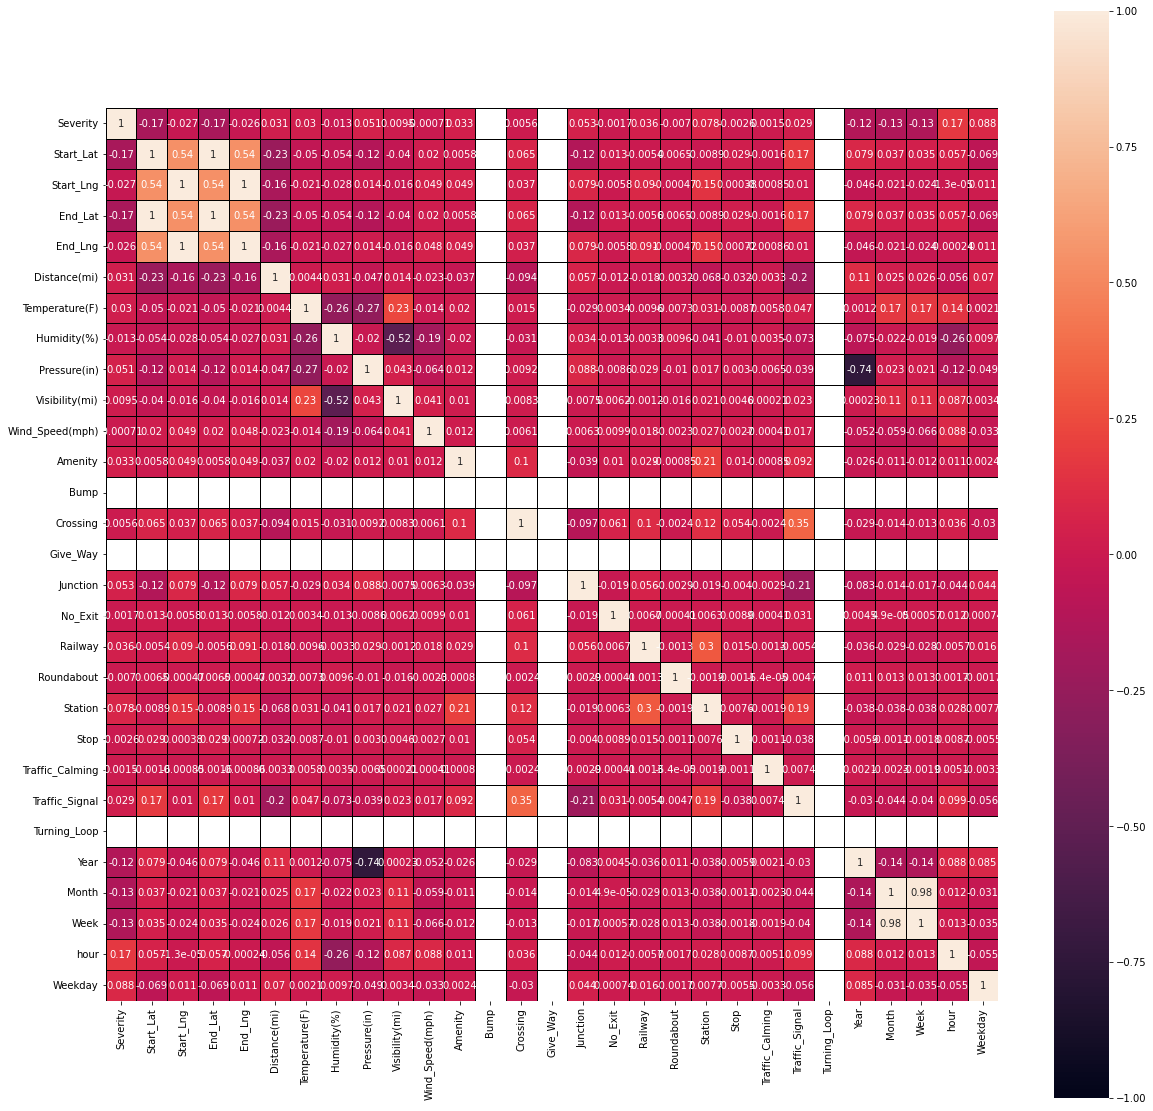

In [27]:
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(df_illinois.corr(),
annot=True,linewidths=1,linecolor='k',square=True,mask=False, 
vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [28]:
df_illinois.dtypes

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object


# Yearly Analysis of Accidents

In [29]:
df2.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Week', 'hour', 'Weekday'],
      dtype='object')

No. of accident in year wise?

In [30]:
df_illinois["Year"].value_counts()

2017    9727
2020    9083
2021    8247
2018    7043
2016    6677
2019    6328
Name: Year, dtype: int64

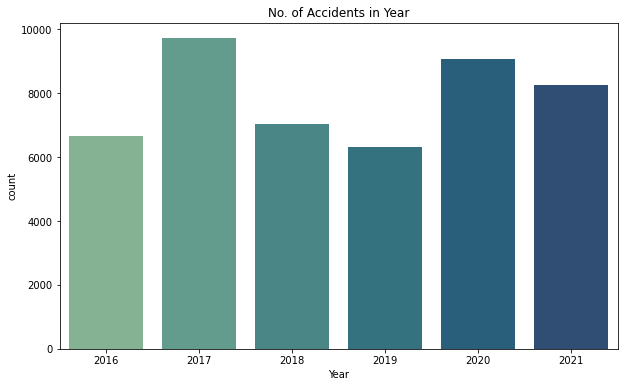

In [31]:
fig, ax = plt.subplots(figsize = (10,6))
c = sns.countplot(x="Year", data=df_illinois, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

Insight:

- Highest accident count is for the year 2017, followed by 2020.

In [32]:
year_max_acc=df_illinois["Year"].value_counts()
year_max_acc

2017    9727
2020    9083
2021    8247
2018    7043
2016    6677
2019    6328
Name: Year, dtype: int64

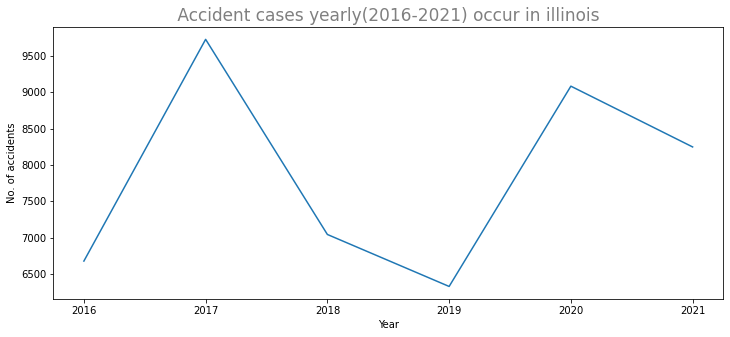

In [33]:
plt.figure(figsize=(12,5))
sns.lineplot(data=year_max_acc)
plt.title(" Accident cases yearly(2016-2021) occur in illinois ",size=17,color="grey")
plt.xlabel('Year')
plt.ylabel('No. of accidents')
plt.show()

From the above line plot we can infer that, there were a large number of accidents that happened in the year 2017, and after that, the graph/accident declined till 2019 and started increasing again.

# Monthly Analysis of Accidents

### Accident count in month of year 2017

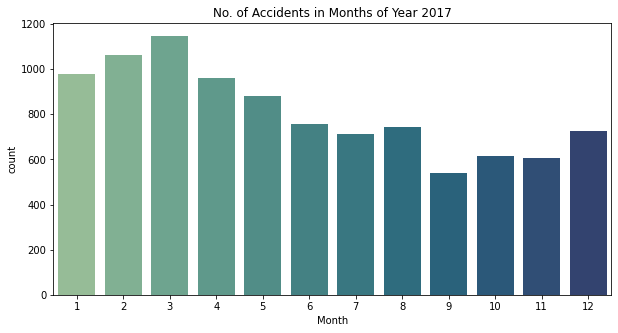

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2017, orient = 'v', palette = "crest")
# plt.annotate('Data Not Available',xy=(1,10000), fontsize=11)
c.set_title("No. of Accidents in Months of Year 2017")
plt.show()

Insights:

- As we see the chart it tells that in 2017 the maximum no. of accident occurs in month of "March"
- In march the number of accident is very high and the main reason for that can be snowfall and cold weather in the month of march.

#### No. of accidents in month of year 2020 (Covid-19 Pandemic)

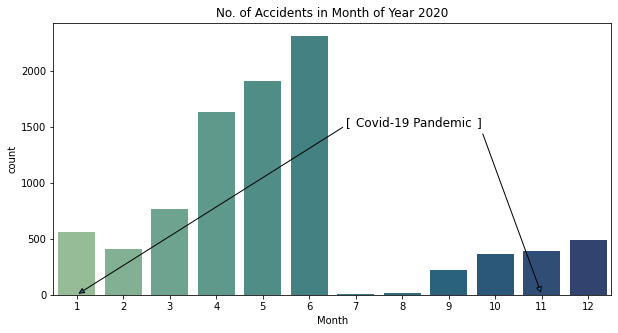

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(6,1500), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(5.8,1500),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(10,1),xytext=(8.6,1500),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

Insight:

- As we see in the chart, In 2020 the most of the accidents is in June (~2500)
- In July and August, the count of accident is reduced to a level that we cannot see it in the bar chart. The major reason can be the start of COVID-19, because of which, people started avoiding going outside.

#### No. of accidents from 2016 - 2021 months

In [36]:
year_month = df_illinois["Start_Time"].groupby(df_illinois.Start_Time.dt.to_period("M")).agg('count').reset_index(name='Num_Accidents')
year_month.head() ### Create the panda series for trend plot below and name or reset the value counts column as Num_Accidents

,Start_Time,Num_Accidents
0,2016-04,1
1,2016-06,381
2,2016-07,833
3,2016-08,1070
4,2016-09,930


<AxesSubplot:title={'center':'Number of Accidents of 2016-2021 by Months'}, xlabel='Month', ylabel='Number of Accidents'>

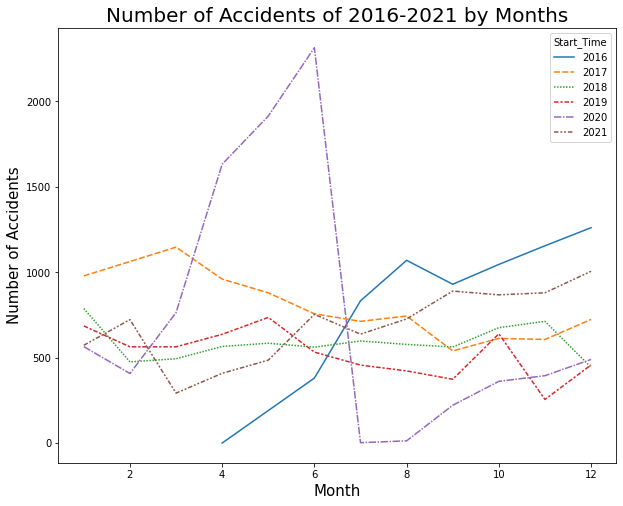

In [37]:
# creating line plot for all year , month accidents count
palette = sns.color_palette("tab10", 6)
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Number of Accidents",fontsize=15)
plt.title('Number of Accidents of 2016-2021 by Months',size=20)
sns.lineplot(data=df_illinois, x=year_month.Start_Time.dt.month, y=year_month.Num_Accidents, hue=year_month.Start_Time.dt.year,
             style=year_month.Start_Time.dt.year, palette=palette)

#### No. of accidents in year 2016 week

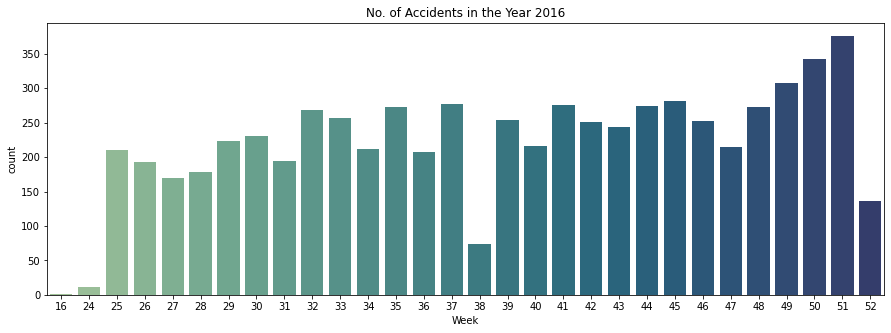

In [38]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x='Week', data=data_2016, orient = 'v', palette = "crest")
# plt.annotate('Data Not Available',xy=(3,250), fontsize=11)
c.set_title("No. of Accidents in the Year 2016")
plt.show()

Insights:

- In week 51 most accident is occur , We also that this is the festival time, Huge no. of people go outside to attend the festival. So because of huge no. of people go outside and will increase the posibility of accident

In [39]:
df_illinois.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Week', 'hour', 'Weekday'],
      dtype='object')

#### No. of Accidents in Months of Year 2021

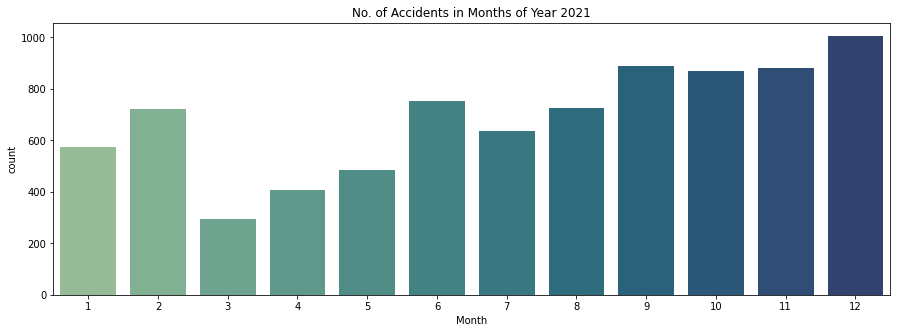

In [40]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x="Month", data=data_2021, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Months of Year 2021")
plt.show();

Insights:
- The less no. of accident occur in march 2021 , the corona pandamic is not ended and people avoide to go outside from their homes. 
- In month 6,7,8,9,10 and 11 the accidents casses are increses because,As of May 26, 2021, Illinois has administered 11,049,665 COVID-19 vaccine doses. 49% of the population has been fully vaccinated , many people are going outside and the accidents casses are increases in month 6,7,8,9,10,11 and 12.


# Weekly Analysis of Accidents

In [41]:
df_illinois.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Week,hour,Weekday
21357,A-21358,2,2016-09-14 17:31:13,2016-09-14 23:31:13,41.518134,-90.512947,41.51950,-90.51301,0.094,At Illinois/Iowa State Line - Accident.,...,False,Day,Day,Day,Day,2016,9,37,17,2
21358,A-21359,2,2016-09-14 17:31:13,2016-09-14 23:31:13,41.519500,-90.513010,41.52527,-90.51341,0.399,Between Memorial Brg and US-67/State St/Exit 4...,...,False,Day,Day,Day,Day,2016,9,37,17,2
31490,A-31491,4,2016-08-01 01:22:44,2016-08-01 07:22:44,40.849930,-90.749460,40.86438,-90.73975,1.120,Closed between Media and North St - Road close...,...,False,Night,Night,Night,Night,2016,8,31,1,0


### No. of Accidents each Week from year 2016 - 2021

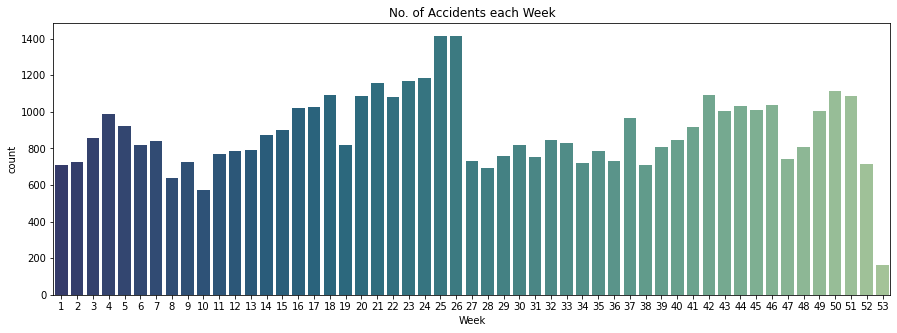

In [42]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x="Week", data=df_illinois, orient = 'v', palette = "crest_r")
# plt.annotate('Week',xy=(2,480000), fontsize=12)
# plt.annotate('Weekend',xy=(5.1,350000), fontsize=12)
c.set_title("No. of Accidents each Week")
plt.show()

Insight:
- As seen in graph that large no. of accidents happened in week 25 and 26  

#### No. of Accidents in Weekdays

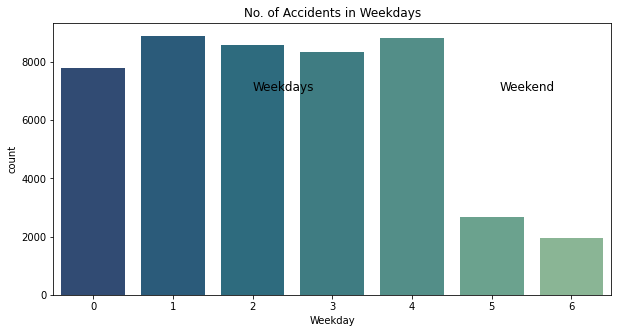

In [43]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Weekday", data=df_illinois, orient = 'v', palette = "crest_r")
plt.annotate('Weekdays',xy=(2,7000), fontsize=12)
plt.annotate('Weekend',xy=(5.1,7000), fontsize=12)
c.set_title("No. of Accidents in Weekdays")
plt.show()

Insights:

- accident cases are less during weekends i.e satuday and sunday and evenly distributed during business days.



## hour

In [44]:
time_max_acc=df_illinois['hour'].value_counts()
time_max_acc

17    4530
16    4396
15    3467
18    3400
8     2823
7     2820
14    2689
6     2291
13    2148
9     2118
12    2078
10    1698
11    1650
19    1590
5     1318
22    1162
21    1148
23    1115
20    1074
4      822
1      792
0      724
2      678
3      574
Name: hour, dtype: int64

#### Time of day most accidents occur in U.S. State Of illinois

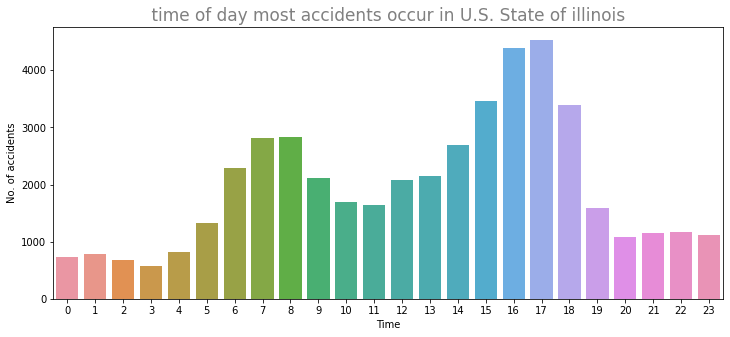

In [45]:
plt.figure(figsize=(12,5))
sns.barplot(y=time_max_acc, x=time_max_acc.index)
plt.title(" time of day most accidents occur in U.S. State of illinois ",size=17,color="grey")
plt.xlabel('Time')
plt.ylabel('No. of accidents')
plt.show()

insight:

- Most accident occur between 2:00PM - 6:00PM
- most-deadliest accident hour is 5:00PM
- next highest accident occur between 7:00AM - 8:00AM

#### Time of day most accidents occur in U.S. State Of illinois in 2020

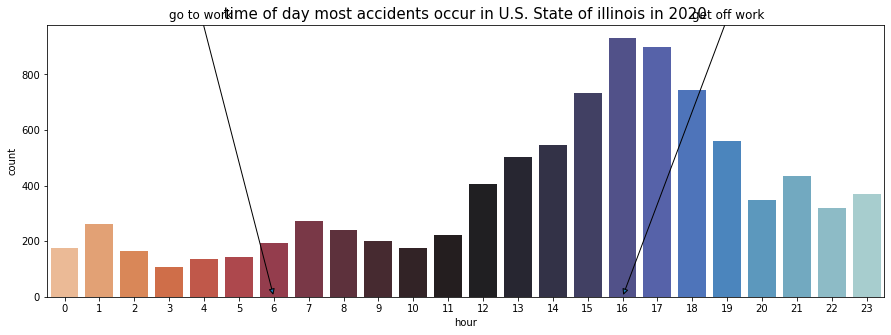

In [46]:
fig, ax = plt.subplots(figsize = (15,5))
sns.countplot(x="hour", data=data_2020, orient = 'v', palette = "icefire_r")
# plt.annotate('Morning Peak',xy=(6,4200), fontsize=12)
# plt.annotate('Afternoon Peak',xy=(15,4200), fontsize=12)
plt.title(" time of day most accidents occur in U.S. State of illinois in 2020 ",size=15,color="black")
plt.annotate('go to work',xy=(6,0),xytext=(3,1000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(16,0),xytext=(18,1000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

insight:

- Most accident occurs between 2:00PM - 7:00PM
- most-deadliest accident hour is 4:00PM

## Severity Based Analysis of Accidents

In [47]:
df_illinois['Severity'].unique()

array([2, 4, 3, 1], dtype=int64)

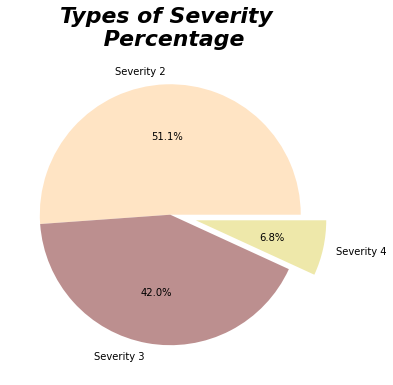

In [48]:
df_sev = df_illinois.groupby('Severity').size()
df_sev = df_sev[[2,3,4]]
cols = ['bisque', 'rosybrown', 'palegoldenrod']
cases = ['Severity 2','Severity 3','Severity 4']
plt.figure(figsize=(10,6))
plt.pie(df_sev,
        colors = cols,
        labels= cases,
        explode = (0,0,0.2), #moving slices apart
        autopct = ('%1.1f%%')) #to display %
plt.title('Types of Severity \n Percentage', weight='heavy', fontsize=22, style='italic');
plt.show()

Insight:
- Severity 2 ,percentage is high compare to 3 and 4 . So we can say that most accident are not much severe.  

#### No. of accidents by each severity level in Year/Week from 2016-2021

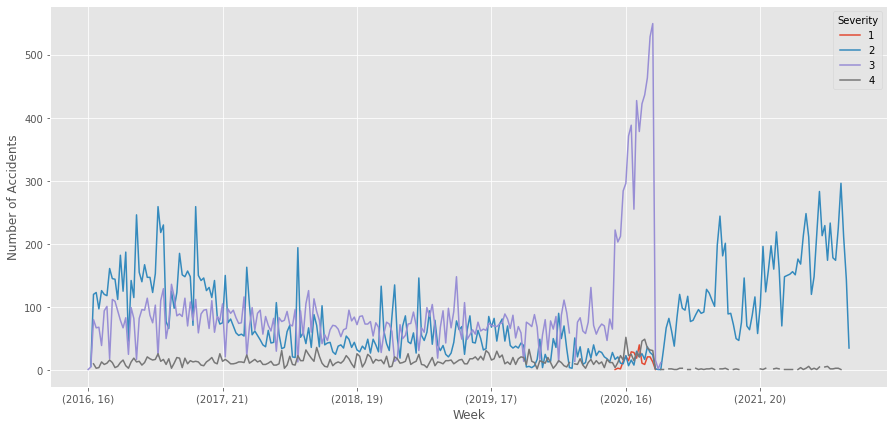

In [49]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,7))
df_illinois.groupby(['Year','Week','Severity']).count()['ID'].unstack().plot(ax=ax)
ax.set_xlabel('Week')
ax.set_ylabel('Number of Accidents')
plt.show()

Insights:
- As the grsph shows , most of the accident casses in 2020 are in severity 3 and no. of accidents are much higher in 
week 16 approximately ~550.
- And all accidents are happened in severity 2. 

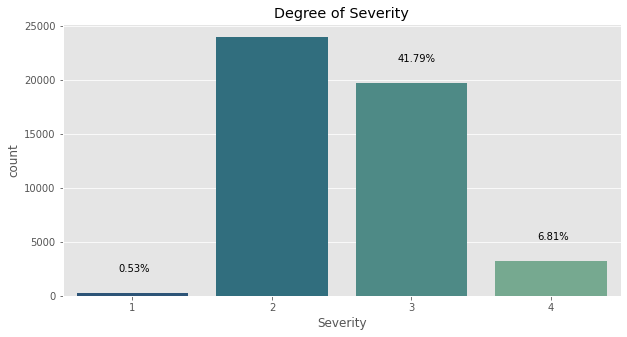

In [50]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Severity", data=df_illinois, orient = 'v', palette = "crest_r")
c.set_title("Degree of Severity")
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(df_illinois.Severity))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+2000
    ax.annotate(count, (x, y))
plt.show()

- In 80% Cases of road accidents, the impact on the traffic was Moderate (Severity-2).

- In 6.81% Cases of road accidents, the impact on the traffic was highly Severe (Severity-4).

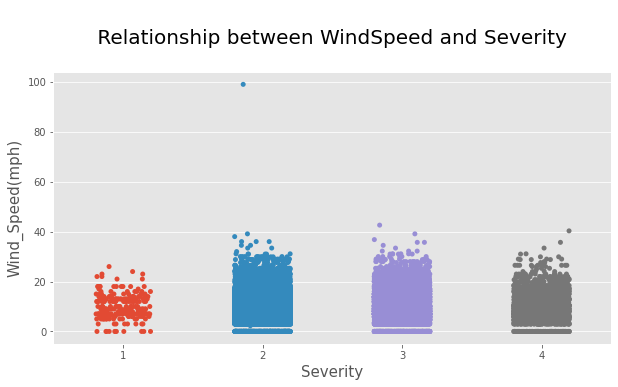

In [51]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between WindSpeed and Severity \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df_illinois['Severity'],y=df_illinois['Wind_Speed(mph)'],data=df_illinois,jitter=0.2)
plt.show()

<AxesSubplot:title={'center':'\n Relationship between Visibility and Severity \n'}, xlabel='Severity', ylabel='Visibility(mi)'>

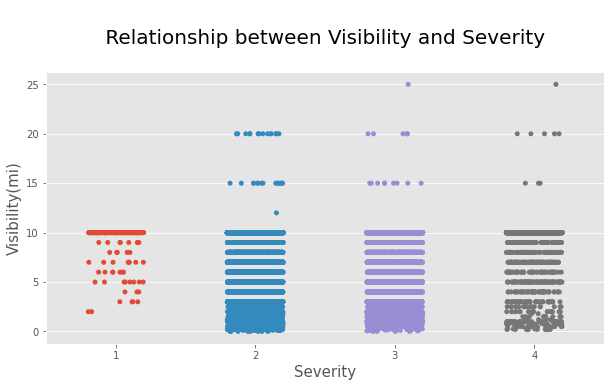

In [52]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Visibility and Severity \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df_illinois['Severity'],y=df_illinois['Visibility(mi)'],data=df_illinois,jitter=0.2)

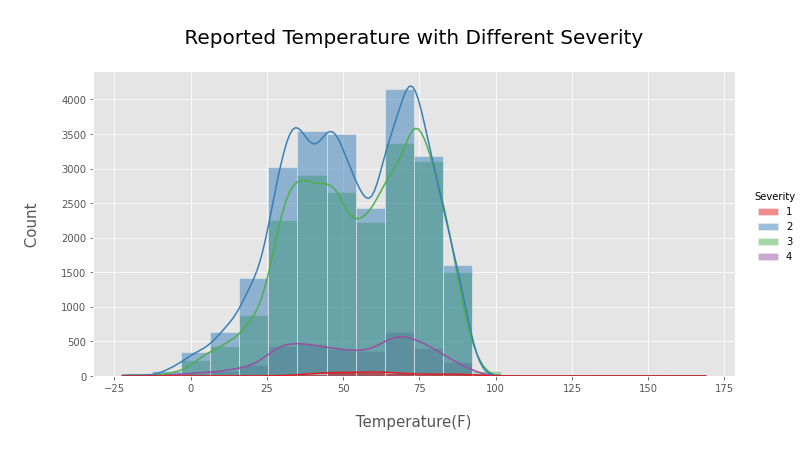

In [53]:
sns.displot(df_illinois, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Temperature with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)
plt.show()

### integrate severity into Temperature(F) distribution. 

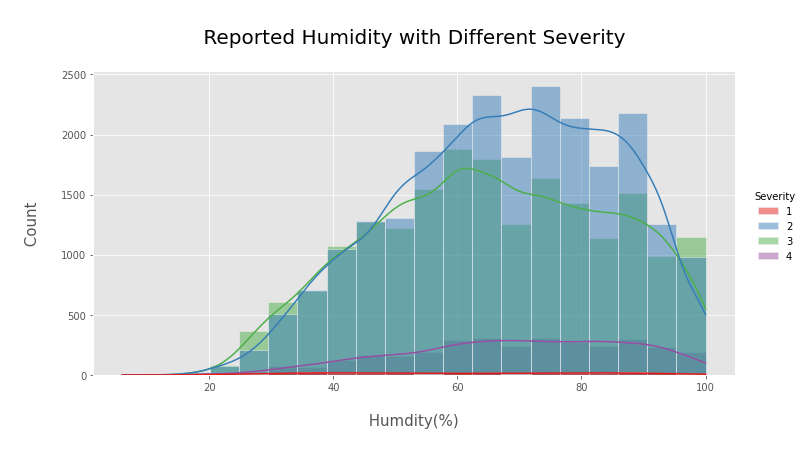

In [54]:
sns.displot(df_illinois, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Humidity with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Humdity(%) \n', fontsize=15)
plt.show()

## Day/Night

In [55]:
df_illinois['Sunrise_Sunset'].unique()

array(['Day', 'Night'], dtype=object)

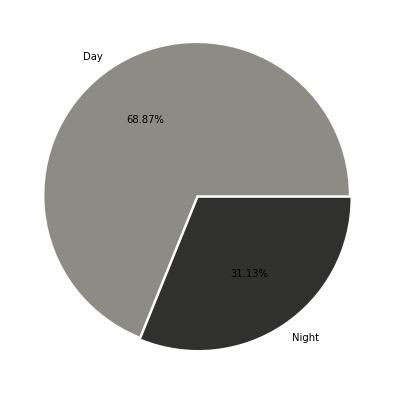

In [56]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
labels = ['Day','Night']
colors = ['#8c8b84','#30302f']
plt.pie(df_illinois['Sunrise_Sunset'].value_counts(normalize=True), labels=labels, autopct='%1.2f%%', colors=colors, explode=(0.01, 0.01))
# show plot
plt.show()

Insights:
- Most of the accidents occurs in Day, It may be because people are going outside in day for thier work . 

In [57]:
df_illinois.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Week', 'hour', 'Weekday'],
      dtype='object')

## Cities

In [58]:
top_cities=df_illinois['City'].value_counts().head(10)
top_cities

Chicago         11188
Gurnee           1429
Lake Zurich      1233
Waukegan         1197
Libertyville     1144
Grayslake         874
Lake Forest       834
Mundelein         806
Elmhurst          754
Des Plaines       723
Name: City, dtype: int64

Text(0, 0.5, 'City')

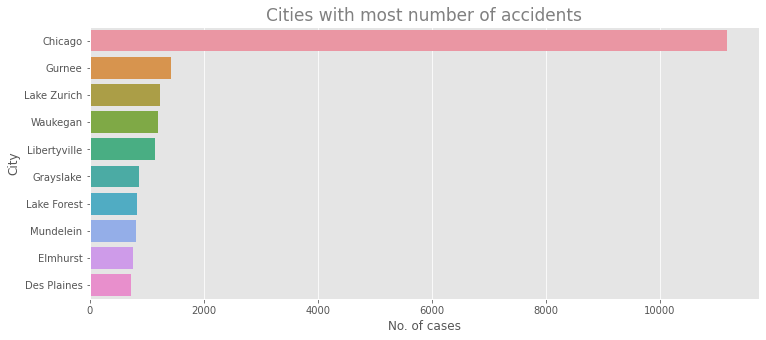

In [59]:
plt.figure(figsize=(12,5))
sns.barplot(y=top_cities.index, x=top_cities)
plt.title("Cities with most number of accidents",size=17,color="grey")
plt.xlabel('No. of cases')
plt.ylabel('City')

Insight:
 - The most of the accidents happened in Chicago city , It is bcz of the population of the city is very high as compare to other cities .
 -  The current metro area population of Chicago in 2022 is 8,901,000

In [60]:
city_count=df_illinois['City'].value_counts()
city_min_accidents=city_count[city_count<10000]
city_min_accidents.tail()

Cairo             1
Chenoa            1
Polo              1
Davis Junction    1
Lynn Center       1
Name: City, dtype: int64

In [61]:
df_illinois.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Week', 'hour', 'Weekday'],
      dtype='object')

In [62]:
df_illinois['Timezone'].value_counts()

US/Central    47098
US/Eastern        7
Name: Timezone, dtype: int64

- Most of the accidents are in US/Central area.

In [63]:
timezone_max_acc=df_illinois['Timezone'].value_counts()
timezone_max_acc

US/Central    47098
US/Eastern        7
Name: Timezone, dtype: int64

In [64]:
street_acc_count=df_illinois['Street'].value_counts()
street_max_acc=street_acc_count.head(10)
street_max_acc

I-94 W                              2838
I-90 E                              1850
I-294 N                             1670
Chicago-Kansas City Expressway E    1299
Chicago-Kansas City Expressway W    1109
I-294 S                             1000
Tri State Tollway S                  870
I-90 W                               542
I-57 N                               488
Adlai E Stevenson Expy N             485
Name: Street, dtype: int64

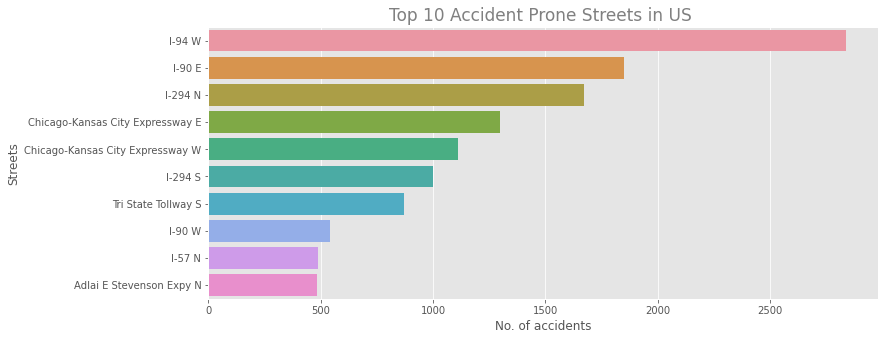

In [65]:
plt.figure(figsize=(12,5))
sns.barplot(y=street_max_acc.index, x=street_max_acc)
plt.title("Top 10 Accident Prone Streets in US ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Streets')
plt.show()

Insight

- I-95 N street had max accident cases i.e ~3000


In [66]:
top_streets=df_illinois["Street"].value_counts().sort_values()[-10:].reset_index()
top_streets.columns=["street_name","number_of_accidents"]

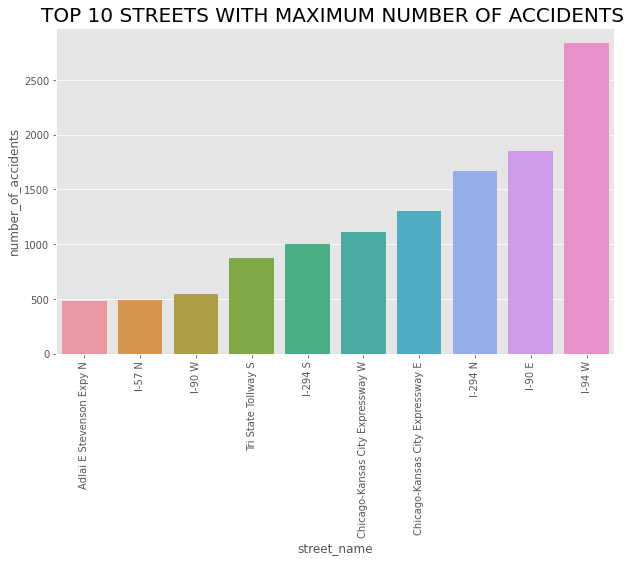

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_streets["street_name"],y=top_streets["number_of_accidents"])
plt.xticks(rotation=90)
plt.title("TOP 10 STREETS WITH MAXIMUM NUMBER OF ACCIDENTS ",fontsize=20)
plt.show()

# Weather Impact On Accidents

In [68]:
weather = df_illinois.iloc[:, 17:26]
weather['Severity'] = df_illinois['Severity']
weather.head()

,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Severity
21357,US/Central,KMLI,2016-09-14 17:52:00,75.9,52.0,30.17,10.0,NE,6.9,2
21358,US/Central,KMLI,2016-09-14 17:52:00,75.9,52.0,30.17,10.0,NE,6.9,2
31490,US/Central,KGBG,2016-08-01 01:15:00,69.8,88.0,30.03,10.0,Calm,7.0,4
31491,US/Central,KGBG,2016-08-01 01:35:00,69.4,89.0,30.03,10.0,East,3.5,4
31574,US/Central,KUGN,2016-11-30 14:55:00,37.0,79.0,29.59,10.0,West,8.1,2


<AxesSubplot:>

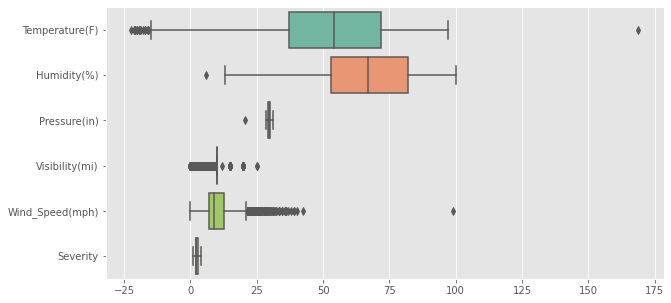

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(data=weather, orient="h", palette="Set2")

In [70]:
def remove_outliers(df_illinois,name='feature'):
    #Store the 25th and 75th percentile 
    q25,q75=np.percentile(df_illinois[name],25),np.percentile(df_illinois[name],75)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q75-q25)
    #Create variable of lower and upper cut
    lower,upper=q25-iqr_cut,q75+iqr_cut
    #Remove the outliers
    df_illinois=df_illinois[(df_illinois[name] >= lower) & (df_illinois[name] <= upper)]
    return df

In [71]:
weather = remove_outliers(weather,name='Temperature(F)')
# weather = remove_outliers(weather,name='Wind_Chill(F)')
weather = remove_outliers(weather,name='Humidity(%)')
weather = remove_outliers(weather,name='Pressure(in)')
weather = remove_outliers(weather,name='Wind_Speed(mph)')

In [72]:
df_illinois.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Week', 'hour', 'Weekday'],
      dtype='object')

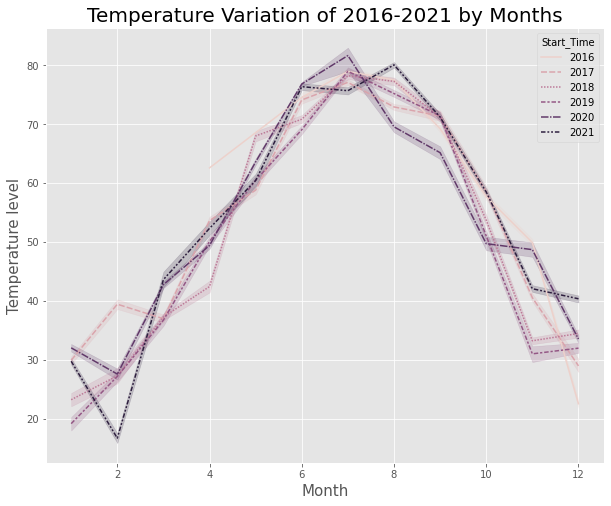

In [73]:
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Temperature level",fontsize=15)
plt.title('Temperature Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df_illinois, x=df_illinois.Start_Time.dt.month, y=df_illinois["Temperature(F)"], hue=df_illinois.Start_Time.dt.year,
             style=df_illinois.Start_Time.dt.year)
plt.show()

### Accidents Count By Temperature(F)

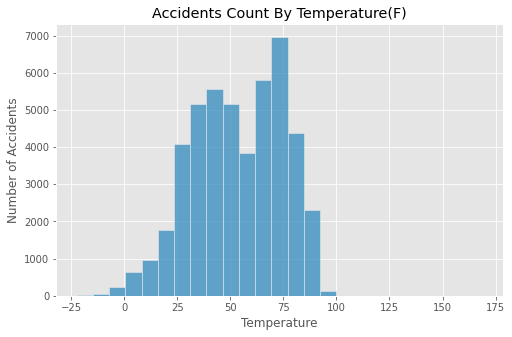

In [74]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df_illinois['Temperature(F)'],bins = 25)
plt.xlabel("Temperature")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count By Temperature(F)')

plt.show()

Insight:
- As we see that most of the accidents are happened in 75 fahrenheit . So the temperature is not the main reason for accidents.

#### No. of Accidents by the wind speeed

In [75]:
df_illinois['Wind_Speed(mph)'].unique()

array([ 6.9,  7. ,  3.5,  8.1, 15. ,  9.2, 12.7, 13.8, 11.5, 16.1, 10.4,
        5.8, 17.3,  4.6, 18.4, 21.9, 23. , 19.6, 20.7, 25.3, 24.2, 26.5,
       27.6, 28.8, 33.4, 31.1, 39.1, 29.9, 42.6, 32.2,  2.3, 34.5, 35.7,
        0. ,  3. , 13. ,  5. , 17. ,  6. , 16. , 18. ,  8. ,  9. , 12. ,
       22. , 10. , 14. , 21. , 25. , 20. , 24. , 29. , 36. , 26. , 30. ,
       28. , 31. , 32. , 38. , 36.8, 99. , 40.3])

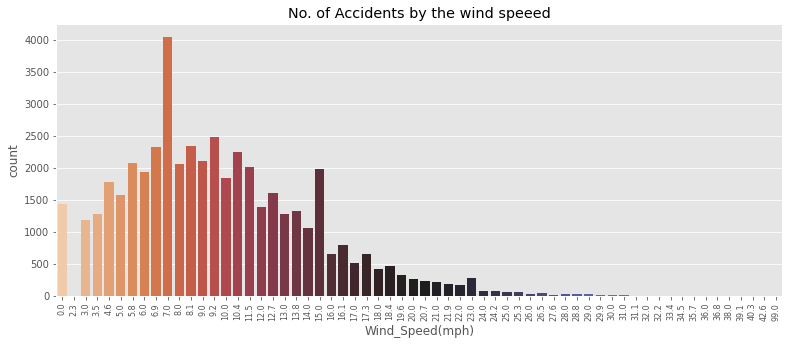

In [76]:
fig, ax = plt.subplots(figsize = (13,5))
c = sns.countplot(x="Wind_Speed(mph)", data=df_illinois, orient = 'h', palette = "icefire_r",)
c.set_title("No. of Accidents by the wind speeed")
plt.xticks(fontsize=8, rotation=90)
plt.show()

Insight:
- Most of the accident are happens in 7 mphs ≈ 11.27 kmh, Wind speed is Light breeze at 4-7 mph.
- So it shows that wind speed is the reason for accidents.

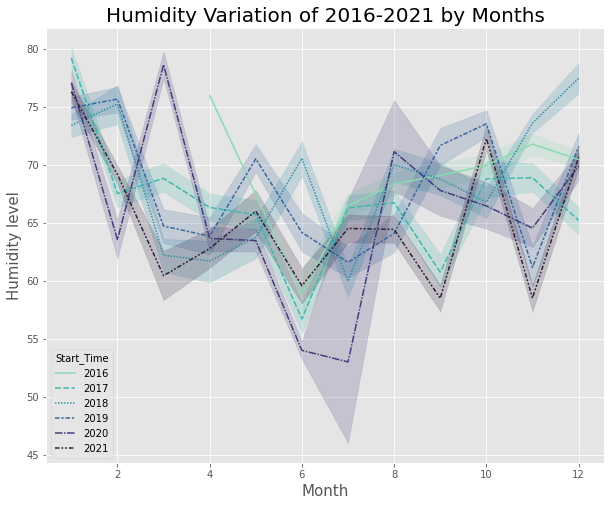

In [77]:
plt.figure(figsize = (10,8))
palette= sns.color_palette("mako_r",6)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Humidity level",fontsize=15)
plt.title('Humidity Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df_illinois, x=df_illinois.Start_Time.dt.month, y=df_illinois["Humidity(%)"],
             hue=df_illinois.Start_Time.dt.year, style=df_illinois.Start_Time.dt.year,palette=palette)
plt.show()

#### Accidents Count By Humidity(%)

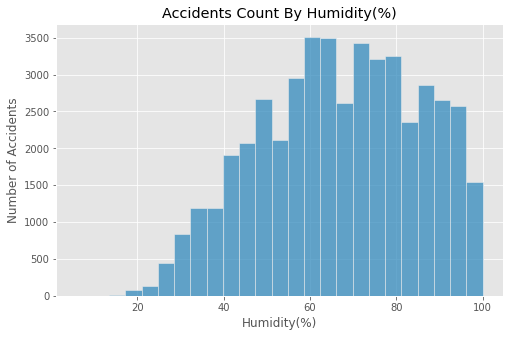

In [78]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df_illinois['Humidity(%)'],bins = 25)
plt.xlabel("Humidity(%)")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count By Humidity(%)')
plt.show()

Insights:
- Experts generally agree that the ideal indoor/outdoor humidity levels for comfort and for avoiding health effects are between 35 and 60 percent and we see in our graph that most of the accidents are occur in 60% - 80% of humidity level So humdity is not reason for accidents.

#### Accident cases for different weather conditions occur in state of illinois

In [79]:
weather_effect=df_illinois["Weather_Condition"].value_counts()
weather_con=weather_effect.head(10)
weather_con

Fair                8434
Mostly Cloudy       7419
Clear               6408
Overcast            6036
Partly Cloudy       4757
Cloudy              4696
Light Rain          2366
Scattered Clouds    2214
Light Snow          1718
Rain                 394
Name: Weather_Condition, dtype: int64

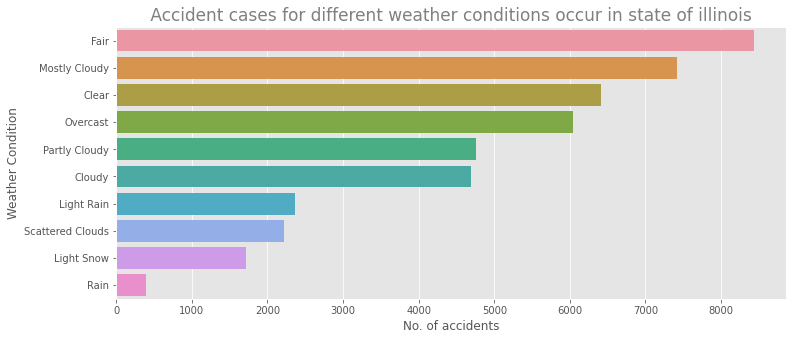

In [80]:
plt.figure(figsize=(12,5))
sns.barplot(x=weather_con, y=weather_con.index)
plt.title(" Accident cases for different weather conditions occur in state of illinois ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Weather Condition')
plt.show()

Insights:

- As we look in the chart it shows that most of the accidents is happpens in fair weather condition ,So weather not much effect the accidents

In [81]:
df_illinois.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Week', 'hour', 'Weekday'],
      dtype='object')

In [82]:
df_weather=df_illinois['Weather_Condition']=='Condition'
df_weather.head(10)

21357    False
21358    False
31490    False
31491    False
31574    False
31585    False
31591    False
31608    False
31621    False
31629    False
Name: Weather_Condition, dtype: bool

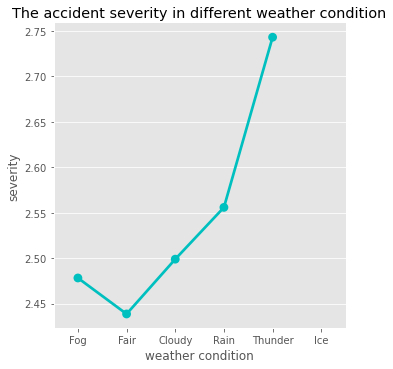

In [83]:
s = sns.catplot(x='Weather_Condition',y='Severity',data=df_illinois,kind='point',ci=None,color='c',
                order=['Fog','Fair','Cloudy','Rain','Thunder','Ice'])
s.set(title='The accident severity in different weather condition',
      xlabel='weather condition',ylabel='severity')
plt.show()

insights

- under extreme weather conditions like Rain and thunder, the severity is much higher


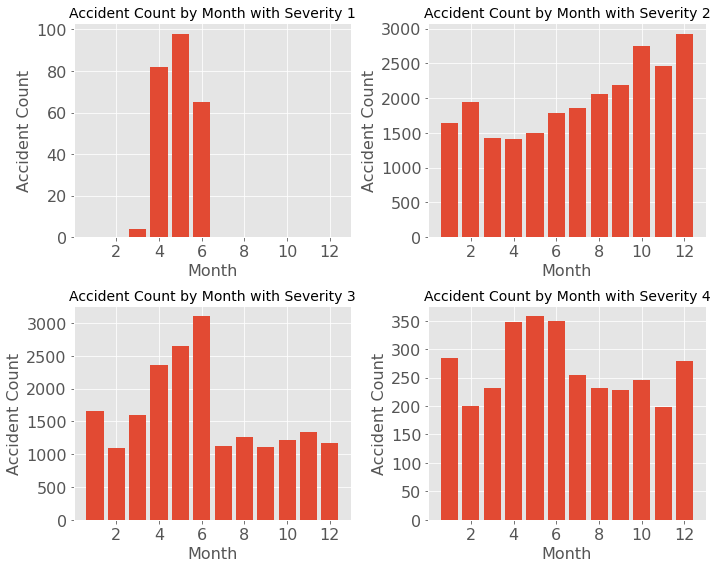

In [84]:
df_illinois['time'] = pd.to_datetime(df_illinois.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(10,8))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df_illinois.loc[df_illinois["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

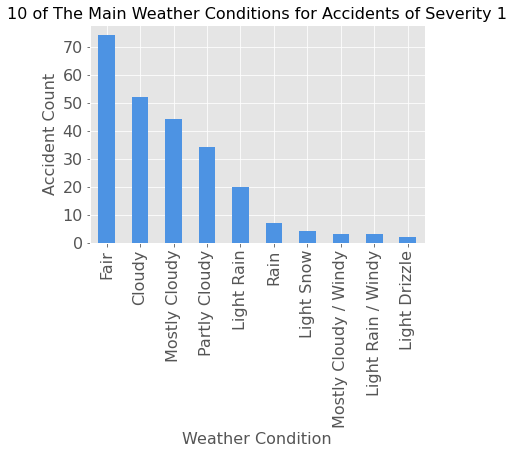

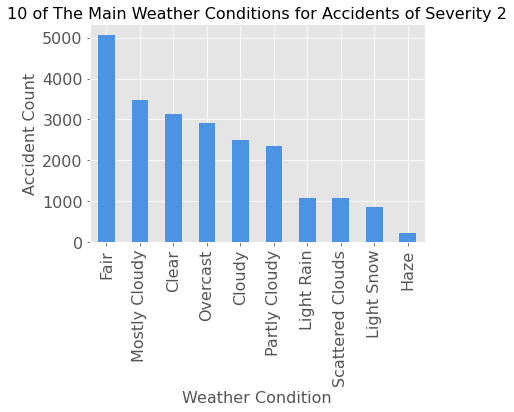

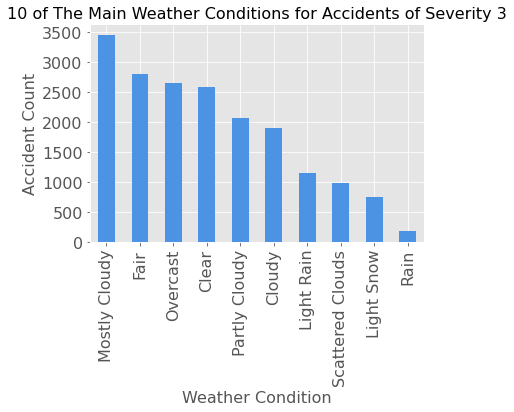

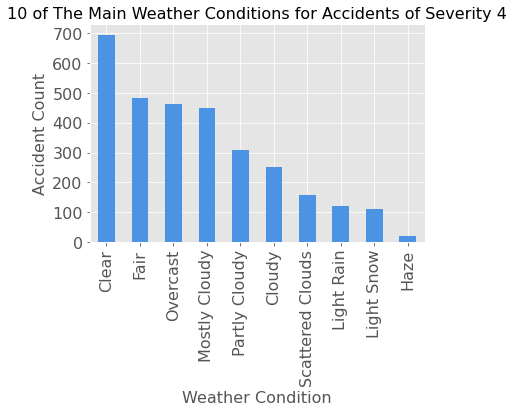

In [85]:
for x in np.arange(1,5):
    plt.subplots(figsize=(6,4))
    df_illinois.loc[df_illinois["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,color='#4d93e3',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('10 of The Main Weather Conditions for Accidents of Severity ' + str(x),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

In [86]:
print("Unique Cat. : ",weather["Wind_Direction"].unique())
print("Unique Values : ",weather["Wind_Direction"].nunique())

Unique Cat. :  ['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']
Unique Values :  24


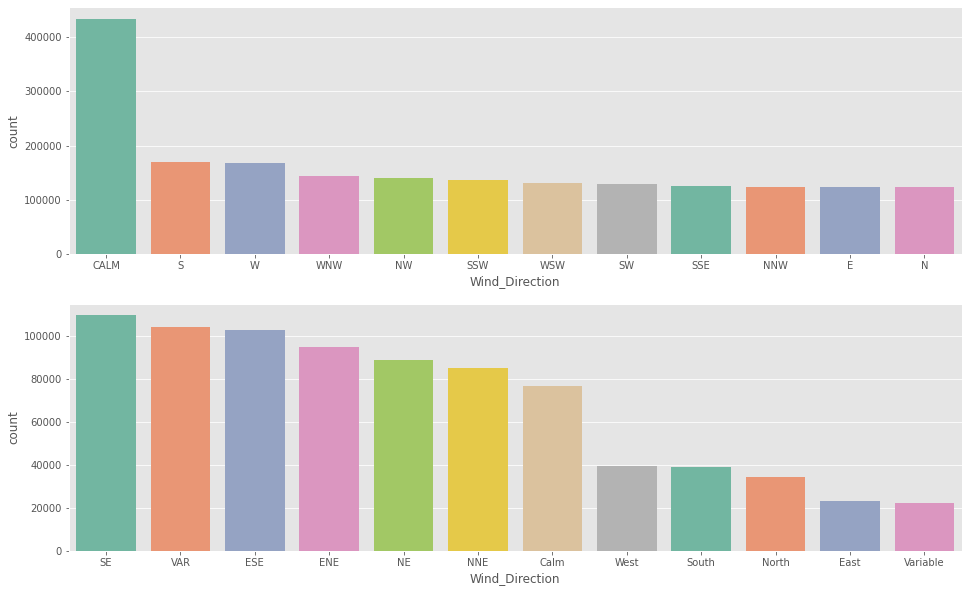

In [87]:
f,ax=plt.subplots(2,figsize=(16,10))
sns.countplot(x="Wind_Direction",
              data=weather,
              order=weather.Wind_Direction.value_counts().iloc[0:12].index,
              palette="Set2",
              ax=ax[0])
sns.countplot(x="Wind_Direction",
              data=weather,
              order=weather.Wind_Direction.value_counts().iloc[12:24].index,
              palette="Set2",
              ax=ax[1])
plt.show()

In [88]:
df_illinois.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month', 'Week', 'hour', 'Weekday', 'time'],
      dtype='object')

## Location Analysis

In [89]:
from folium.plugins import HeatMap
sample_df= df_illinois.sample(int(0.001*len(df)))
lat_lng_pairs= list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))
map= folium.Map([38.552397, -96],zoom_start=6, min_zoom = 5, max_zoom = 13)
HeatMap(lat_lng_pairs).add_to(map)
map

Above is another interesting map that shows where car accidents occur more frequently.
It shows that most of the accident occur in North of the illinois state and near Chicago city.

### Dimensionality Reduction

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.

Here are some of the benefits of applying dimensionality reduction to a dataset:

- Space required to store the data is reduced as the number of dimensions comes down

- Less dimensions lead to less computation/training time

- Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful

- It takes care of multicollinearity by removing redundant features. For example, you have two variables – "time spent on treadmill in minutes" and "calories burnt". These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require

Features 'ID' doesn't provide any useful information about accidents themselves. 'Distance(mi)', 'End_Time' (we have start time), 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has already happened and hence cannot be predictors for serious accident prediction. For 'Description', the POI features have already been extracted from it by dataset creators. Let's get rid of these features first.

In [90]:
df_illinois1 = df_illinois.drop(['ID','Description','Distance(mi)', 'End_Time', 'End_Lat', 'End_Lng'], axis=1)

In [91]:
cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
    print(i,df_illinois1[i].unique().size)

Unique count of categorical features:
Side 2
Country 1
Timezone 2
Amenity 2
Bump 1
Crossing 2
Give_Way 1
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 2
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


Drop 'Country' and 'Turning_Loop' for they have only one class.

In [92]:
df_illinois1 = df_illinois1.drop(['Country','Turning_Loop'], axis=1)

### Cleaning Up Categorical Features

If we look at categorical features closely, we will find some chaos in 'Wind_Direction' and 'Weather_Condition'. It is necessary to clean them up first.

#### Wind_Direction

In [93]:
print("Wind Direction: ", df_illinois1['Wind_Direction'].unique())

Wind Direction:  ['NE' 'Calm' 'East' 'West' 'WSW' 'SW' 'WNW' 'NW' 'NNW' 'North' 'Variable'
 'South' 'ESE' 'ENE' 'SSW' 'SSE' 'SE' 'NNE' 'CALM' 'S' nan 'N' 'W' 'VAR'
 'E']


In [94]:
df_illinois1.loc[df_illinois1['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df_illinois1.loc[(df_illinois1['Wind_Direction']=='West')|(df_illinois1['Wind_Direction']=='WSW')|(df_illinois1['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df_illinois1.loc[(df_illinois1['Wind_Direction']=='South')|(df_illinois1['Wind_Direction']=='SSW')|(df_illinois1['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df_illinois1.loc[(df_illinois1['Wind_Direction']=='North')|(df_illinois1['Wind_Direction']=='NNW')|(df_illinois1['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df_illinois1.loc[(df_illinois1['Wind_Direction']=='East')|(df_illinois1['Wind_Direction']=='ESE')|(df_illinois1['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df_illinois1.loc[df_illinois1['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df_illinois1['Wind_Direction'].unique())

Wind Direction after simplification:  ['NE' 'CALM' 'E' 'W' 'SW' 'NW' 'N' 'VAR' 'S' 'SE' nan]


#### Weather Condition

Weather-related vehicle accidents kill more people annually than large-scale weather disasters(source: weather.com). According to Road Weather Management Program, most weather-related crashes happen on wet-pavement and during rainfall. Winter-condition and fog are another two main reasons for weather-related accidents. To extract these three weather conditions, we first look at what we have in 'Weather_Condition' Feature.

In [95]:
# show distinctive weather conditions 
weather ='!'.join(df_illinois1['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drizzle', 'Fair', 'Fog', 'Haze', 'Heavy Drizzle', 'Heavy Rain', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Light ', 'Light Drizzle', 'Light Ice Pellets', 'Light Rain', 'Light Rain Showers', 'Light Snow', 'Light Thunderstorms', 'Mist', 'N/A Precipitation', 'Overcast', 'Patches of Fog', 'Rain', 'Scattered Clouds', 'Sleet', 'Smoke', 'Snow', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Windy', 'Wintry Mix']


Create features for some common weather conditions and drop 'Weather_Condition' then.

In [96]:
df_illinois1['Clear'] = np.where(df_illinois1['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df_illinois1['Cloud'] = np.where(df_illinois1['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df_illinois1['Rain'] = np.where(df_illinois1['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df_illinois1['Heavy_Rain'] = np.where(df_illinois1['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df_illinois1['Snow'] = np.where(df_illinois1['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df_illinois1['Heavy_Snow'] = np.where(df_illinois1['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df_illinois1['Fog'] = np.where(df_illinois1['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [97]:
# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df_illinois1.loc[df_illinois1['Weather_Condition'].isnull(),i] = df_illinois1.loc[df_illinois1['Weather_Condition'].isnull(),'Weather_Condition']
    df_illinois1[i] = df_illinois1[i].astype('bool')

df_illinois1.loc[:,['Weather_Condition'] + weather]

df_illinois1 = df_illinois1.drop(['Weather_Condition'], axis=1)

In [98]:
df_illinois1.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Week', 'hour', 'Weekday',
       'time', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow',
       'Fog'],
      dtype='object')

### Label Encoding

In [99]:
df_illinois2 = df_illinois1
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

l = ["Side", "Timezone", "Amenity", "Bump", "Crossing", "Give_Way",
"Junction", "Wind_Direction",
"No_Exit",
"Railway",
"Roundabout",
"Station",
"Stop",
"Traffic_Calming",
"Traffic_Signal",
"Sunrise_Sunset",
"Civil_Twilight",
"Nautical_Twilight",
"Astronomical_Twilight"]

for i in l:
    # Encode labels in column 'species'.
    df_illinois2[i]= label_encoder.fit_transform(df_illinois2[i])
    print(df_illinois2[i].unique())

[1 0]
[0 1]
[0 1]
[0]
[0 1]
[0]
[0 1]
[ 3  0  1  9  7  4  2  8  5  6 10]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1 2]
[0 1 2]
[0 1 2]


In [107]:
X, y = df_illinois2.drop(["Start_Time", "Severity",'Street','Bump', 'City', 'County', 'State',
                          "Zipcode", "Weather_Timestamp",'time', 'Airport_Code'], axis='columns'), df_illinois2['Severity']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47105 entries, 21357 to 2845056
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Start_Lat              47105 non-null  float64
 1   Start_Lng              47105 non-null  float64
 2   Side                   47105 non-null  int32  
 3   Timezone               47105 non-null  int32  
 4   Temperature(F)         47105 non-null  float64
 5   Humidity(%)            47105 non-null  float64
 6   Pressure(in)           47105 non-null  float64
 7   Visibility(mi)         47105 non-null  float64
 8   Wind_Direction         47105 non-null  int32  
 9   Wind_Speed(mph)        47105 non-null  float64
 10  Amenity                47105 non-null  int64  
 11  Crossing               47105 non-null  int64  
 12  Give_Way               47105 non-null  int64  
 13  Junction               47105 non-null  int64  
 14  No_Exit                47105 non-null  int64  
 

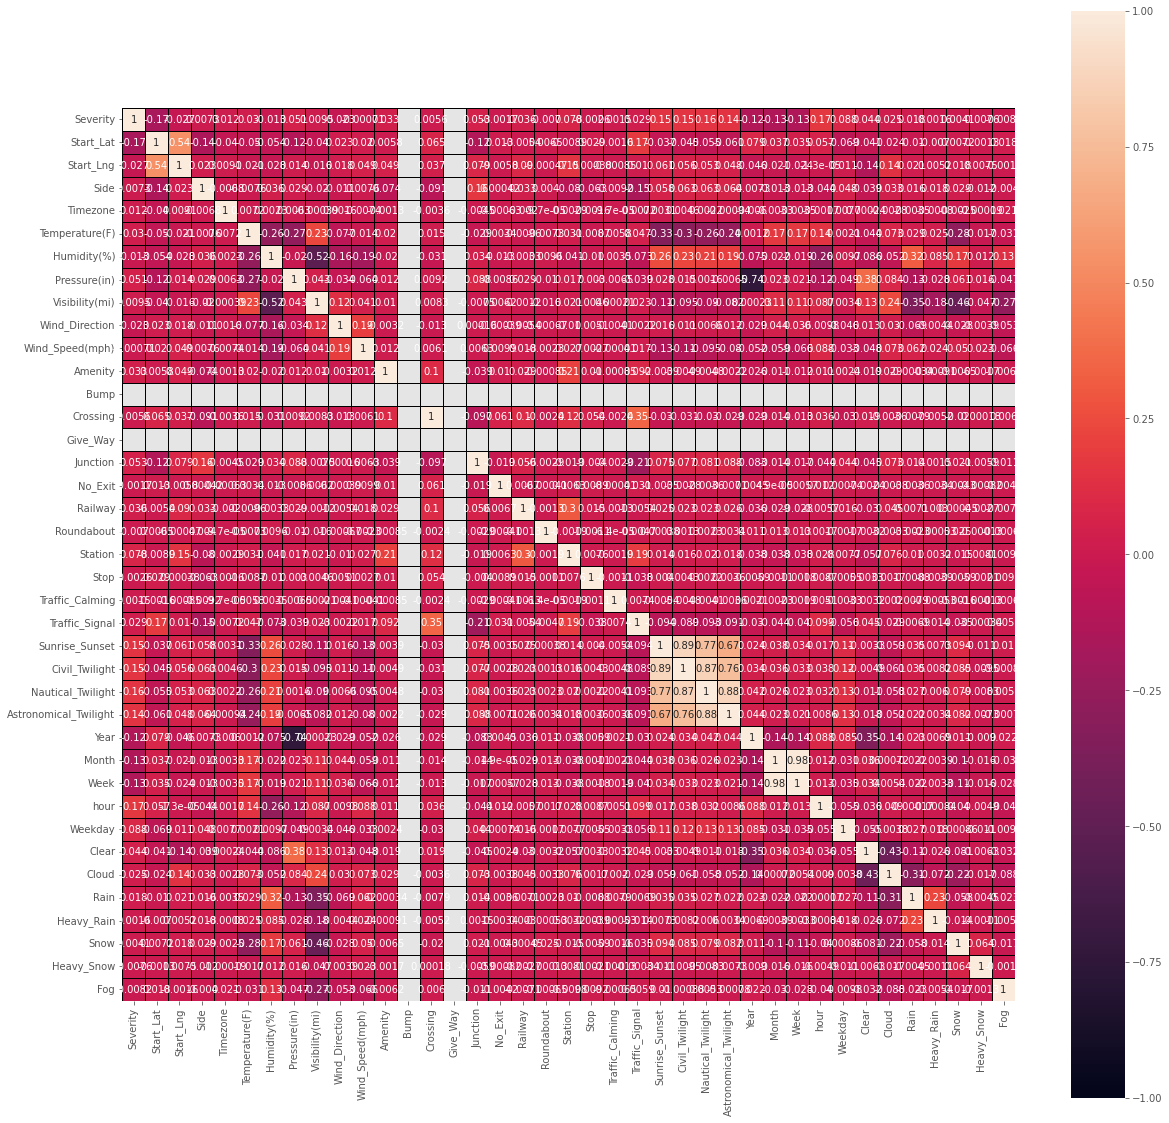

In [108]:
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(df_illinois2.corr(),
annot=True,linewidths=1,linecolor='k',square=True,mask=False, 
vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [110]:
X.columns

Index(['Start_Lat', 'Start_Lng', 'Side', 'Timezone', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Amenity', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month', 'Week',
       'hour', 'Weekday', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow',
       'Heavy_Snow', 'Fog'],
      dtype='object')

In [111]:
X.head()

,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Week,hour,Weekday,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
21357,41.518134,-90.512947,1,0,75.9,52.0,30.17,10.0,3,6.9,...,37,17,2,False,True,False,False,False,False,False
21358,41.519500,-90.513010,1,0,75.9,52.0,30.17,10.0,3,6.9,...,37,17,2,False,True,False,False,False,False,False
31490,40.849930,-90.749460,0,0,69.8,88.0,30.03,10.0,0,7.0,...,31,1,0,True,False,False,False,False,False,False
31491,40.849930,-90.749460,0,0,69.4,89.0,30.03,10.0,1,3.5,...,31,1,0,True,False,False,False,False,False,False
31574,42.305960,-87.960150,1,0,37.0,79.0,29.59,10.0,9,8.1,...,48,14,2,False,True,False,False,False,False,False


In [112]:
X.columns

Index(['Start_Lat', 'Start_Lng', 'Side', 'Timezone', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Amenity', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month', 'Week',
       'hour', 'Weekday', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow',
       'Heavy_Snow', 'Fog'],
      dtype='object')

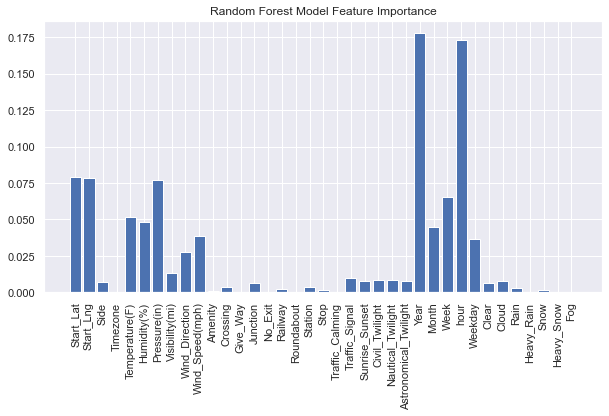

In [113]:
model = RandomForestClassifier()
model.fit(X, y)

features = ['Start_Lat', 'Start_Lng', 'Side', 'Timezone', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Amenity', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month', 'Week',
       'hour', 'Weekday', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow',
       'Heavy_Snow', 'Fog']
    
    
feature_df = pd.DataFrame({"Importance":model.feature_importances_, 
"Features": features })
plt.figure(figsize=(10, 5))
sns.set()
plt.bar(feature_df["Features"], feature_df["Importance"])
plt.xticks(rotation=90)
plt.title("Random Forest Model Feature Importance")
plt.show()

In [114]:
feature_df= feature_df.sort_values(by='Importance', ascending=True)
feature_df

,Importance,Features
16,0.000000,Roundabout
12,0.000000,Give_Way
19,0.000001,Traffic_Calming
35,0.000016,Heavy_Snow
3,0.000031,Timezone
14,0.000303,No_Exit
33,0.000308,Heavy_Rain
36,0.000481,Fog
10,0.001105,Amenity
18,0.001583,Stop


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
features = feature_df.Features.unique()
scores = []

for feature in features:
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    print(model.score(X_test, y_test))
    X_train.drop(feature, axis='columns', inplace=True)
    X_test.drop(feature, axis='columns', inplace=True)

0.8677082448840961
0.8658401969941412
0.8651609068523393
0.8671138660100195
0.866519487135943
0.8648212617814384
0.8681328012227223
0.868047889954997
0.8668591322068439
0.8688970026322493
0.8688970026322493
0.8689819138999745
0.8679629786872718
0.8692366477031502
0.8686422688290736
0.8683875350258979
0.8674535110809204
0.8711046955931052
0.8694064702386006
0.8716141631994566
0.8729727434830602
0.8715292519317314
0.8721236308058079
0.8711896068608305
0.8750106139084657
0.8750955251761909
0.8743313237666638
0.8697461153095015
0.8684724462936232
0.8667742209391186
0.8683875350258979
0.8653307293877898
0.8295830856754691
0.805213551838329
0.7444170841470663
0.7906088137895899
0.6477031502080326


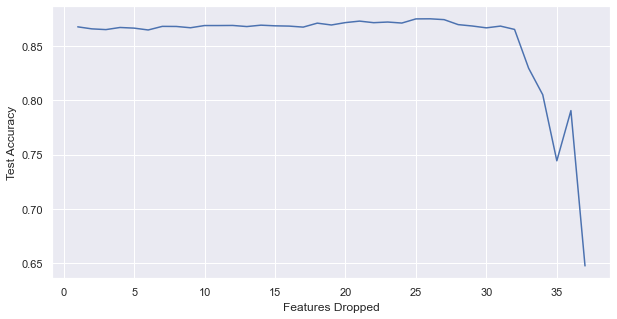

In [116]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 38, 1), scores)
plt.xlabel("Features Dropped")
plt.ylabel("Test Accuracy")
plt.show()

In [117]:
for i in range(len(features)):
    print("Score:", scores[i])
    print("\nFeature Dropped:", features[i])

Score: 0.8677082448840961

Feature Dropped: Roundabout
Score: 0.8658401969941412

Feature Dropped: Give_Way
Score: 0.8651609068523393

Feature Dropped: Traffic_Calming
Score: 0.8671138660100195

Feature Dropped: Heavy_Snow
Score: 0.866519487135943

Feature Dropped: Timezone
Score: 0.8648212617814384

Feature Dropped: No_Exit
Score: 0.8681328012227223

Feature Dropped: Heavy_Rain
Score: 0.868047889954997

Feature Dropped: Fog
Score: 0.8668591322068439

Feature Dropped: Amenity
Score: 0.8688970026322493

Feature Dropped: Stop
Score: 0.8688970026322493

Feature Dropped: Snow
Score: 0.8689819138999745

Feature Dropped: Railway
Score: 0.8679629786872718

Feature Dropped: Rain
Score: 0.8692366477031502

Feature Dropped: Station
Score: 0.8686422688290736

Feature Dropped: Crossing
Score: 0.8683875350258979

Feature Dropped: Clear
Score: 0.8674535110809204

Feature Dropped: Junction
Score: 0.8711046955931052

Feature Dropped: Side
Score: 0.8694064702386006

Feature Dropped: Astronomical_Twilig

In [118]:
features

array(['Roundabout', 'Give_Way', 'Traffic_Calming', 'Heavy_Snow',
       'Timezone', 'No_Exit', 'Heavy_Rain', 'Fog', 'Amenity', 'Stop',
       'Snow', 'Railway', 'Rain', 'Station', 'Crossing', 'Clear',
       'Junction', 'Side', 'Astronomical_Twilight', 'Cloud',
       'Sunrise_Sunset', 'Nautical_Twilight', 'Civil_Twilight',
       'Traffic_Signal', 'Visibility(mi)', 'Wind_Direction', 'Weekday',
       'Wind_Speed(mph)', 'Month', 'Humidity(%)', 'Temperature(F)',
       'Week', 'Pressure(in)', 'Start_Lng', 'Start_Lat', 'hour', 'Year'],
      dtype=object)

In [119]:
X_cleaned, y_cleaned = df_illinois2[['Visibility(mi)', 'Wind_Direction', 'Weekday',
       'Wind_Speed(mph)', 'Month', 'Humidity(%)', 'Temperature(F)',
       'Week', 'Pressure(in)', 'Start_Lng', 'Start_Lat', 'hour', 'Year']], df_illinois2['Severity']

In [120]:
X_cleaned.shape

(47105, 13)

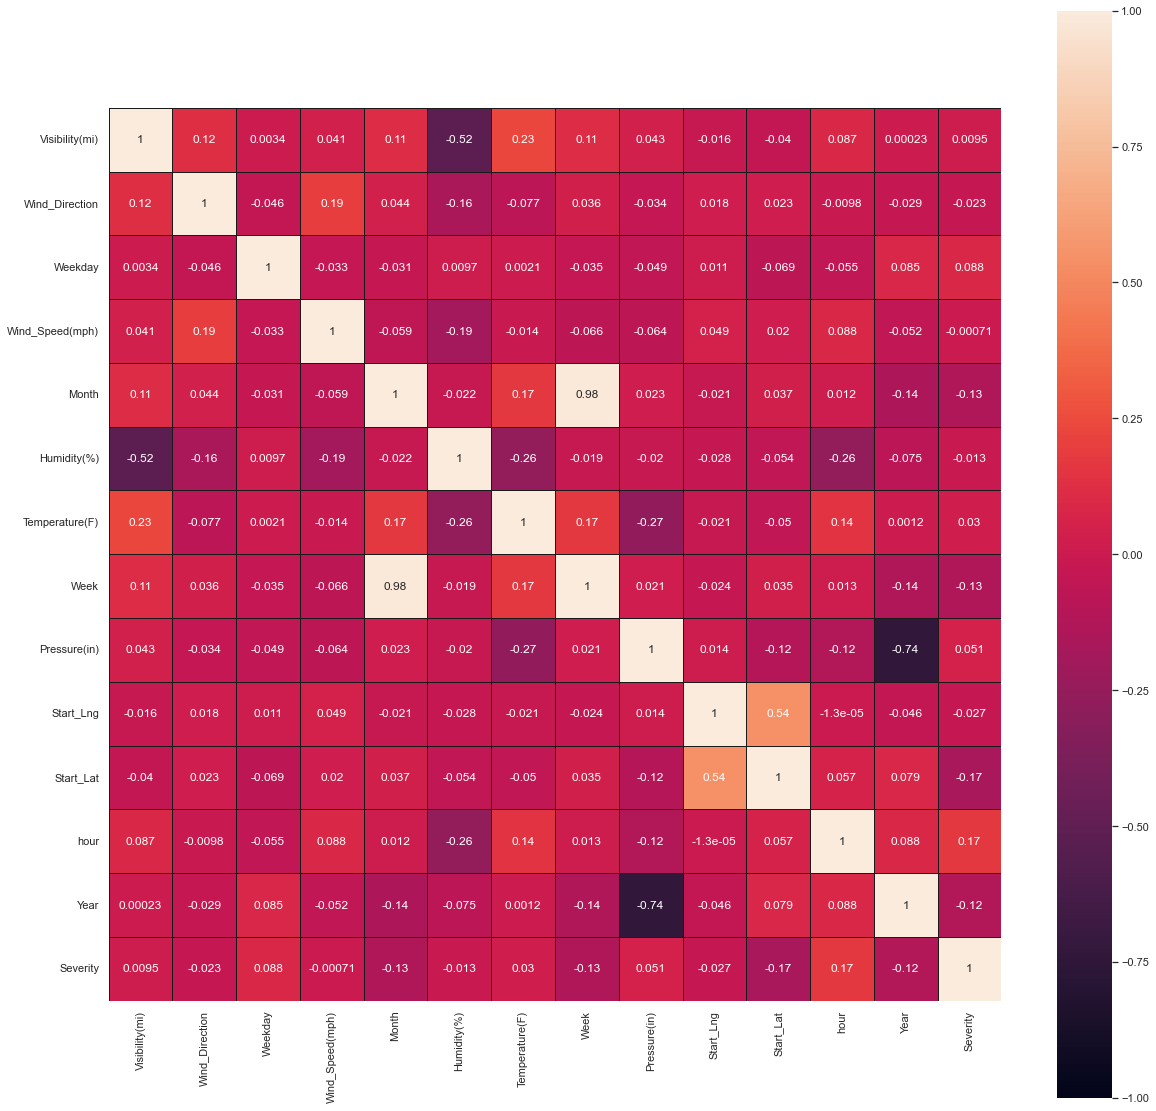

In [121]:
df_cleaned = df_illinois2[['Visibility(mi)', 'Wind_Direction', 'Weekday',
       'Wind_Speed(mph)', 'Month', 'Humidity(%)', 'Temperature(F)',
       'Week', 'Pressure(in)', 'Start_Lng', 'Start_Lat', 'hour', 'Year', 'Severity']]

fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(df_cleaned.corr(),
annot=True,linewidths=1,linecolor='k',square=True,mask=False, 
vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

### Clustering

### K-Means Clustering

In [122]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_cleaned)
    distortions.append(kmeanModel.inertia_)

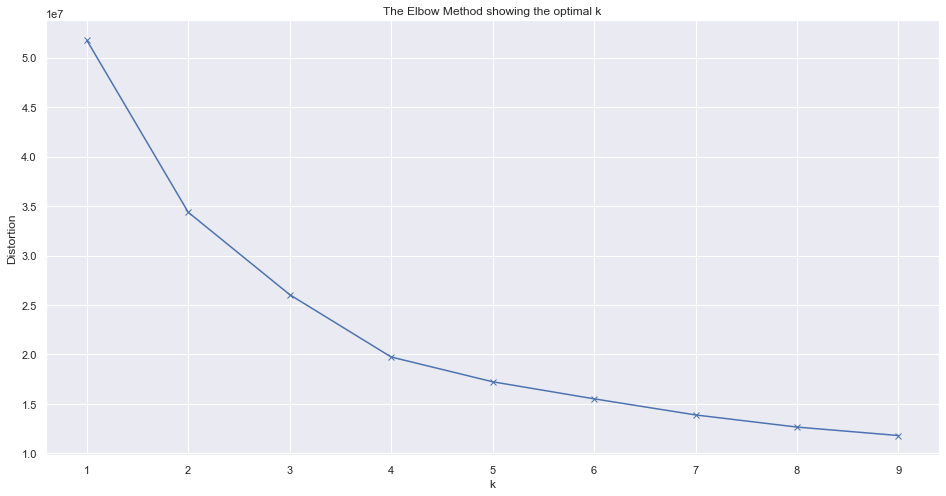

In [123]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [124]:
X_cleaned1= X_cleaned
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(X_cleaned1)

X_cleaned1['k_means']=kmeanModel.predict(X_cleaned1)
X_cleaned1['target']=y_cleaned

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(X_cleaned1['target'], X_cleaned1['k_means']))
print(rms)

1.7834286553754684


In [125]:
from sklearn.metrics import silhouette_score
silhouette_score(X_cleaned, X_cleaned1['k_means'])

0.32632545496810555

### DBSCAN [Density-Based Spatial Clustering of Applications with Noise]

In [126]:
from sklearn.cluster import DBSCAN
X_cleaned2 = X_cleaned
dbscan=DBSCAN()
y_pred = dbscan.fit_predict(X_cleaned2)

In [127]:
rms = np.sqrt(mean_squared_error(y_cleaned, y_pred))
print(rms)

36.67984224170175


In [128]:
silhouette_score(X_cleaned, y_pred)

-0.6920307138445279

## Time Series Forecasting

In [130]:
df_forecasting = df_illinois[['Start_Time', 'Severity']]
df_forecasting

,Start_Time,Severity
21357,2016-09-14 17:31:13,2
21358,2016-09-14 17:31:13,2
31490,2016-08-01 01:22:44,4
31491,2016-08-01 01:27:46,4
31574,2016-11-30 14:46:48,2
...,...,...
2845052,2019-08-23 17:41:30,3
2845053,2019-08-23 18:26:04,3
2845054,2019-08-23 19:10:56,3
2845055,2019-08-23 21:04:04,3


In [131]:
df_forecasting.isna().sum()

Start_Time    0
Severity      0
dtype: int64

In [132]:
df_forecasting['Start_Time'] = pd.to_datetime(df_forecasting['Start_Time']).dt.date
df_forecasting

,Start_Time,Severity
21357,2016-09-14,2
21358,2016-09-14,2
31490,2016-08-01,4
31491,2016-08-01,4
31574,2016-11-30,2
...,...,...
2845052,2019-08-23,3
2845053,2019-08-23,3
2845054,2019-08-23,3
2845055,2019-08-23,3


### Plot before Aggregation

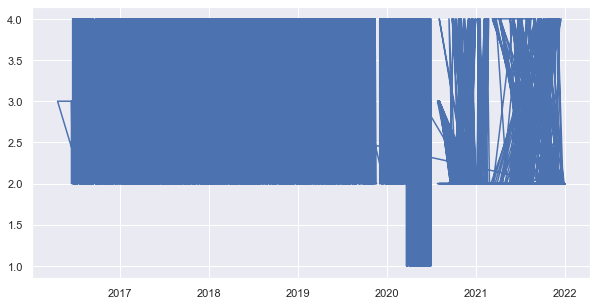

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(df_forecasting['Start_Time'], df_forecasting['Severity'])

In [134]:
df_forecasting['Start_Time'] = pd.to_datetime(df_forecasting['Start_Time'])

In [135]:
df_forecasting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47105 entries, 21357 to 2845056
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Time  47105 non-null  datetime64[ns]
 1   Severity    47105 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 MB


In [136]:
df_forecasting

,Start_Time,Severity
21357,2016-09-14,2
21358,2016-09-14,2
31490,2016-08-01,4
31491,2016-08-01,4
31574,2016-11-30,2
...,...,...
2845052,2019-08-23,3
2845053,2019-08-23,3
2845054,2019-08-23,3
2845055,2019-08-23,3


In [137]:
df_forecasting1 = df_forecasting.groupby([df_forecasting['Start_Time']]).agg(pd.Series.mode).reset_index().sort_values('Start_Time')
df_forecasting1

,Start_Time,Severity
0,2016-04-21,3
1,2016-06-17,2
2,2016-06-21,2
3,2016-06-22,2
4,2016-06-23,2
...,...,...
1895,2021-12-27,2
1896,2021-12-28,2
1897,2021-12-29,2
1898,2021-12-30,2


### Aggregation of Data to Daily-wise

In [138]:
df_forecasting1['Start_Time'] = pd.to_datetime(df_forecasting1['Start_Time']) - pd.to_timedelta(7, unit='d')

df_forecasting2=df_forecasting1.groupby([pd.Grouper(key='Start_Time', freq='D')])['Severity'].agg(pd.Series.mode).reset_index()
cleaned_Severity = []
for i in df_forecasting2['Severity'].to_list():
    try:
        cleaned_Severity.append(max(i))
    except:
        cleaned_Severity.append(i)
        
l=[]
for i in cleaned_Severity:
    try:
        if len(i)==0:
            l.append(0)
    except:
        l.append(i)
df_forecasting2['Severity'] = l
df_forecasting2

,Start_Time,Severity
0,2016-04-14,3
1,2016-04-15,0
2,2016-04-16,0
3,2016-04-17,0
4,2016-04-18,0
...,...,...
2076,2021-12-20,2
2077,2021-12-21,2
2078,2021-12-22,2
2079,2021-12-23,2


### Plot after aggregation

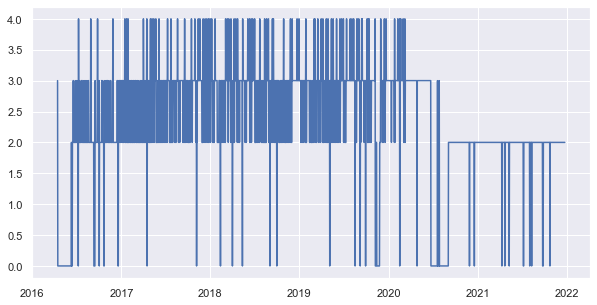

In [139]:
plt.figure(figsize=(10, 5))
plt.plot(df_forecasting2['Start_Time'], df_forecasting2['Severity'])
plt.show()

### Autoregressive Integrated Moving Average [ARIMA]

ARIMA, abbreviated for 'Auto Regressive Integrated Moving Average', is a class of models that 'demonstrates' a given time series based on its previous values: its lags and the lagged errors in forecasting, so that equation can be utilized in order to forecast future values.

<AxesSubplot:xlabel='Start_Time'>

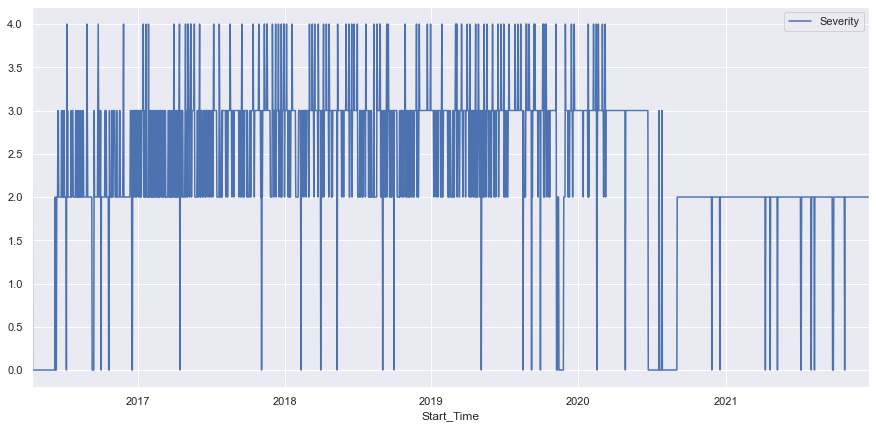

In [140]:
df_forecasting3=df_forecasting2
df_forecasting3.set_index('Start_Time',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df_forecasting3.plot()

In [141]:
import statsmodels.api as sm

model=sm.tsa.arima.ARIMA(df_forecasting3['Severity'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\anupa\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\anupa\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\anupa\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Severity   No. Observations:                 2081
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1899.890
Date:                Tue, 11 Oct 2022   AIC                           3805.779
Time:                        12:46:47   BIC                           3822.700
Sample:                    04-14-2016   HQIC                          3811.980
                         - 12-24-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1093      0.023      4.844      0.000       0.065       0.154
ma.L1         -0.8164      0.014    -57.025      0.000      -0.844      -0.788
sigma2         0.3637      0.006     64.415      0.000       0.353       0.375
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3380.52
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forecasting/Predicting result for 40 days window

<AxesSubplot:xlabel='Start_Time'>

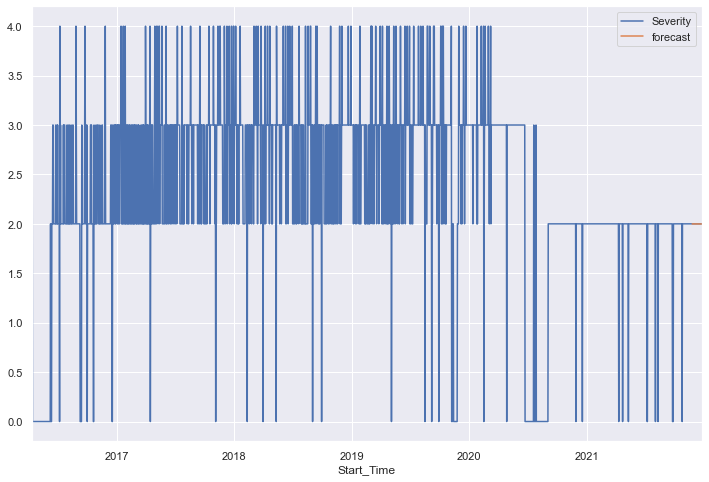

In [142]:
df_forecasting3['forecast']=model_fit.predict(start=2050,end=2090,dynamic=True)
df_forecasting3[['Severity','forecast']].plot(figsize=(12,8))

### Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors [SARIMAX]

Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models. Intuitively, ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA). The former views the value at one time just as a weighted sum of past values. The latter model that same value also as a weighted sum but of past residuals (confer. time series decomposition). There is also an integrated term (I) to difference the time series (we will discuss this further below).

#### Forecasting/Predicting result for 40 days window

C:\Users\anupa\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\anupa\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Start_Time'>

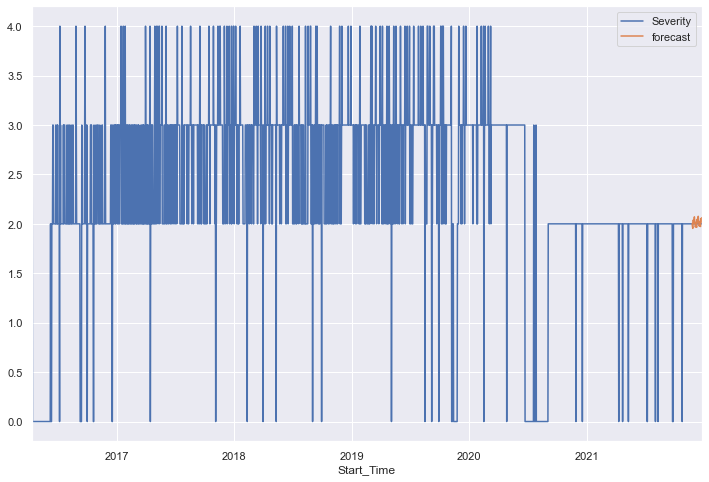

In [143]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_forecasting3['Severity'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_forecasting3['forecast']=results.predict(start=2050,end=2090,dynamic=True)
df_forecasting3[['Severity','forecast']].plot(figsize=(12,8))

**From the above two forecasting plots, we can observe that ARIMA is performing better than SARIMAX.**